In [24]:
from pathlib import Path
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from artool import ar_io
# remove display limits
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

## Data

In [25]:
df_min = pd.read_feather("/home/yangzhe/data/binance/data/futures/um/daily/klines/BTCUSDT/1m/features_H.feather")
df_min.head()

,time_H,price__high,price__min,price,price__mean,price__std,price__median,price__skew,vol,vol__mean,vol__std,vol__median,vol__skew,vol_taker_buy__sum,vol_taker_sell__sum,vol_taker_buy_ratio,vol_taker_buy_ratio__mean,vol_taker_buy_ratio__std,vol_taker_buy_ratio__median,vol_taker_buy_ratio__skew,vol_taker_sell_ratio,vol_taker_sell_ratio__mean,vol_taker_sell_ratio__std,vol_taker_sell_ratio__median,vol_taker_sell_ratio__skew,price_ewm_5m,price_ewm_30m,price_ewm_60m,price_ewm_4h,price_ewm_8h,price_ewm_24h,price_ewm_2d,price_ewm_7d,price_ewm_14d
0,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 01:00:00,29055.00,28706.00,29015.00,28914.487931,68.318759,28926.060,-0.353375,7637.647,131.683569,133.499782,94.5515,3.414068,3689.753,3947.894,0.353211,0.512246,0.178721,0.515137,-0.141465,0.646789,0.487754,0.178721,0.484863,0.141465,29014.196450,28958.391350,28936.594480,28919.430472,28916.881064,28915.266844,28914.874952,28914.598005,28914.542918
2,2021-01-01 02:00:00,29546.42,28975.46,29448.40,29338.059667,135.159156,29391.110,-1.371138,19543.401,325.723350,395.871810,180.9715,3.809761,10386.352,9157.049,0.605835,0.497387,0.170827,0.484256,-0.032809,0.394165,0.502613,0.170827,0.515744,0.032809,29434.497462,29397.715155,29330.975000,29191.269520,29160.788620,29140.166013,29135.010455,29131.332866,29130.598005
3,2021-01-01 03:00:00,29500.00,29159.16,29237.06,29330.345667,64.652735,29327.145,0.327839,10049.720,167.495333,141.286947,120.8870,2.597611,4513.355,5536.365,0.627714,0.479721,0.181485,0.467499,-0.116301,0.372286,0.520279,0.181485,0.532501,0.116301,29238.531437,29287.494520,29307.423992,29258.367005,29230.865671,29209.142322,29203.353859,29199.142880,29198.293451
4,2021-01-01 04:00:00,29379.41,29174.95,29302.11,29282.323000,34.207700,29282.020,-0.012804,5579.452,92.990867,71.198140,64.0740,2.394396,2969.050,2610.402,0.266898,0.527730,0.195164,0.536006,0.097386,0.733102,0.472270,0.195164,0.463994,-0.097386,29316.428214,29299.656947,29293.320025,29270.200638,29249.298981,29230.019280,29224.550657,29220.495814,29219.670433


In [26]:
df_min_spot = pd.read_feather("/home/yangzhe/data/binance/data/spot/daily/klines/BTCUSDT/1m/features_H.feather")
# rename columns
renames = {}
for col in df_min_spot.columns:
    if col == "time_H":
        continue
    else:
        renames[col] = col + "_spot"
df_min_spot = df_min_spot.rename(columns=renames)
df_min_spot.head()


,time_H,price__high_spot,price__min_spot,price_spot,price__mean_spot,price__std_spot,price__median_spot,price__skew_spot,vol_spot,vol__mean_spot,vol__std_spot,vol__median_spot,vol__skew_spot,vol_taker_buy__sum_spot,vol_taker_sell__sum_spot,vol_taker_buy_ratio_spot,vol_taker_buy_ratio__mean_spot,vol_taker_buy_ratio__std_spot,vol_taker_buy_ratio__median_spot,vol_taker_buy_ratio__skew_spot,vol_taker_sell_ratio_spot,vol_taker_sell_ratio__mean_spot,vol_taker_sell_ratio__std_spot,vol_taker_sell_ratio__median_spot,vol_taker_sell_ratio__skew_spot,price_ewm_5m_spot,price_ewm_30m_spot,price_ewm_60m_spot,price_ewm_4h_spot,price_ewm_8h_spot,price_ewm_24h_spot,price_ewm_2d_spot,price_ewm_7d_spot,price_ewm_14d_spot
0,2021-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-01 01:00:00,47321.42,46700.0,46754.74,46959.830169,129.653164,46946.300,0.401805,2313.31611,39.208748,31.783765,31.645350,3.128167,1081.69411,1231.62200,0.234226,0.457795,0.117725,0.464072,-0.140116,0.765774,0.542205,0.117725,0.535928,0.140116,46767.398195,46853.082678,46899.224243,46944.142656,46951.995592,46957.223787,46958.527815,46959.458253,46959.644230
2,2021-09-01 02:00:00,46884.36,46512.0,46859.87,46682.251333,100.473878,46663.575,0.429167,2409.82460,40.163743,40.049268,26.268735,3.473972,1100.63213,1309.19247,0.699266,0.472458,0.128498,0.478567,0.076380,0.300734,0.527542,0.128498,0.521433,-0.076380,46854.385994,46759.271391,46739.679809,46785.100291,46801.439783,46813.527394,46816.677840,46818.956586,46819.415073
3,2021-09-01 03:00:00,47091.19,46731.4,46877.90,46885.813667,79.866118,46868.255,0.375825,1376.66819,22.944470,14.139517,18.080105,1.999724,660.75613,715.91206,0.504750,0.435544,0.147231,0.410073,0.704739,0.495250,0.564456,0.147231,0.589927,-0.704739,46875.760964,46900.322407,46879.446934,46838.742010,46838.016581,46840.098844,46840.967228,46841.674046,46841.824072
4,2021-09-01 04:00:00,47052.89,46688.0,47043.65,46833.189167,75.814555,46822.700,0.522148,975.46531,16.257755,9.956694,14.639390,2.917479,492.40338,483.06193,0.613366,0.525929,0.155080,0.549018,-0.404273,0.386634,0.474071,0.155080,0.450982,0.404273,46985.632078,46878.346519,46855.672982,46837.802784,46836.895993,46838.289925,46838.960000,46839.524526,46839.646205


In [27]:
df_fr = pd.read_feather("/home/yangzhe/data/binance/data/futures/um/daily/klines/BTCUSDT/1m/features_fr.feather")
df_fr.head(5)

,time_H,funding_rate__mean,funding_rate__std,funding_rate__max,funding_rate__min,funding_rate__skew,funding_rate,funding_rate__ewm2d__delta1,funding_rate__ewm7d__delta1,funding_rate__ewm14d__delta1,funding_rate__ewm5m,funding_rate__ewm30m,funding_rate__ewm60m,funding_rate__ewm5m__delta1,funding_rate__ewm30m__delta1,funding_rate__ewm60m__delta1,funding_rate__ewm4h,funding_rate__ewm8h,funding_rate__ewm24h,funding_rate__ewm4h__delta1,funding_rate__ewm8h__delta1,funding_rate__ewm24h__delta1,funding_rate__ewm2d,funding_rate__ewm7d,funding_rate__ewm14d,funding_rate__future_1,funding_rate__future_3,funding_rate__future_5,funding_rate__future_10
0,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,0.0001,0.0001,0.0001
1,2022-01-01 01:00:00,0.0001,4.321852e-21,0.0001,0.0001,0.0,0.0001,0.0,1.355253e-20,0.0,0.0001,0.0001,0.0001,0.0,1.355253e-20,0.0,0.0001,0.0001,0.0001,0.0,0.000000e+00,0.0,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
2,2022-01-01 02:00:00,0.0001,3.945293e-21,0.0001,0.0001,0.0,0.0001,0.0,0.000000e+00,0.0,0.0001,0.0001,0.0001,0.0,0.000000e+00,0.0,0.0001,0.0001,0.0001,0.0,-1.355253e-20,0.0,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
3,2022-01-01 03:00:00,0.0001,0.000000e+00,0.0001,0.0001,0.0,0.0001,0.0,0.000000e+00,0.0,0.0001,0.0001,0.0001,0.0,0.000000e+00,0.0,0.0001,0.0001,0.0001,0.0,0.000000e+00,0.0,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4,2022-01-01 04:00:00,0.0001,0.000000e+00,0.0001,0.0001,0.0,0.0001,0.0,0.000000e+00,0.0,0.0001,0.0001,0.0001,0.0,0.000000e+00,0.0,0.0001,0.0001,0.0001,0.0,0.000000e+00,0.0,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001


In [28]:
print(df_min.shape, df_min_spot.shape)
df = df_min.merge(df_min_spot, on="time_H", how="inner")
print(df.shape)

(15312, 34) (9502, 34)
(9502, 67)


In [29]:
# merge on time_H
print(df.shape, df_fr.shape)
df = df.merge(df_fr, on="time_H", how="inner")
print(df.shape)

(9502, 67) (5856, 29)
(5856, 95)


In [30]:
df.sample(5)

,time_H,price__high,price__min,price,price__mean,price__std,price__median,price__skew,vol,vol__mean,vol__std,vol__median,vol__skew,vol_taker_buy__sum,vol_taker_sell__sum,vol_taker_buy_ratio,vol_taker_buy_ratio__mean,vol_taker_buy_ratio__std,vol_taker_buy_ratio__median,vol_taker_buy_ratio__skew,vol_taker_sell_ratio,vol_taker_sell_ratio__mean,vol_taker_sell_ratio__std,vol_taker_sell_ratio__median,vol_taker_sell_ratio__skew,price_ewm_5m,price_ewm_30m,price_ewm_60m,price_ewm_4h,price_ewm_8h,price_ewm_24h,price_ewm_2d,price_ewm_7d,price_ewm_14d,price__high_spot,price__min_spot,price_spot,price__mean_spot,price__std_spot,price__median_spot,price__skew_spot,vol_spot,vol__mean_spot,vol__std_spot,vol__median_spot,vol__skew_spot,vol_taker_buy__sum_spot,vol_taker_sell__sum_spot,vol_taker_buy_ratio_spot,vol_taker_buy_ratio__mean_spot,vol_taker_buy_ratio__std_spot,vol_taker_buy_ratio__median_spot,vol_taker_buy_ratio__skew_spot,vol_taker_sell_ratio_spot,vol_taker_sell_ratio__mean_spot,vol_taker_sell_ratio__std_spot,vol_taker_sell_ratio__median_spot,vol_taker_sell_ratio__skew_spot,price_ewm_5m_spot,price_ewm_30m_spot,price_ewm_60m_spot,price_ewm_4h_spot,price_ewm_8h_spot,price_ewm_24h_spot,price_ewm_2d_spot,price_ewm_7d_spot,price_ewm_14d_spot,funding_rate__mean,funding_rate__std,funding_rate__max,funding_rate__min,funding_rate__skew,funding_rate,funding_rate__ewm2d__delta1,funding_rate__ewm7d__delta1,funding_rate__ewm14d__delta1,funding_rate__ewm5m,funding_rate__ewm30m,funding_rate__ewm60m,funding_rate__ewm5m__delta1,funding_rate__ewm30m__delta1,funding_rate__ewm60m__delta1,funding_rate__ewm4h,funding_rate__ewm8h,funding_rate__ewm24h,funding_rate__ewm4h__delta1,funding_rate__ewm8h__delta1,funding_rate__ewm24h__delta1,funding_rate__ewm2d,funding_rate__ewm7d,funding_rate__ewm14d,funding_rate__future_1,funding_rate__future_3,funding_rate__future_5,funding_rate__future_10
4463,2022-07-05 23:00:00,20438.0,20242.00,20431.2,20341.570000,43.858908,20342.200,-0.215439,21520.996,358.683267,210.100461,295.6740,1.372725,11132.141,10388.855,0.824937,0.504264,0.133796,0.503959,0.364132,0.175063,0.495736,0.133796,0.496041,-0.364132,20401.930368,20364.040968,20351.321271,20274.294460,20113.787684,19929.803480,19783.954396,19773.055098,20381.870336,20439.99,20252.38,20435.25,20348.285333,44.325147,20349.065,-0.217465,2096.58841,34.943140,18.338496,30.467450,1.999526,1078.16932,1018.41909,0.616821,0.505403,0.138027,0.488303,0.183405,0.383179,0.494597,0.138027,0.511697,-0.183405,20409.089163,20371.496179,20358.228964,20281.225975,20121.758474,19938.665873,19793.059725,19782.630101,20391.835452,0.000094,6.946729e-06,0.000100,0.000079,-0.703941,0.000100,1.652997e-08,4.937153e-09,2.334744e-09,0.000100,0.000081,0.000049,2.142067e-08,4.386580e-07,5.868040e-07,0.000018,0.000031,0.000038,2.379016e-07,9.941163e-08,2.971046e-08,0.000031,0.000028,0.000032,0.000100,0.000079,0.000083,0.000085
4079,2022-06-19 23:00:00,20821.0,20300.00,20683.0,20558.646667,116.164659,20578.350,-0.512424,42485.283,708.088050,567.917860,508.6850,2.028421,22467.331,20017.952,0.392225,0.512107,0.130068,0.497360,-0.093252,0.607775,0.487893,0.130068,0.502640,0.093252,20681.095817,20614.650063,20567.890740,20320.450645,20044.336280,19531.399534,19576.736269,21639.319830,24089.205278,20815.95,20313.00,20695.22,20570.072333,116.302734,20589.690,-0.524855,5281.10582,88.018430,59.862913,65.712950,2.041135,2735.86437,2545.24145,0.424028,0.507776,0.102129,0.506663,0.070463,0.575972,0.492224,0.102129,0.493337,-0.070463,20693.252811,20626.425896,20579.558620,20331.878268,20055.279001,19541.884430,19587.291755,21650.831577,24101.170079,0.000037,5.994912e-06,0.000047,0.000028,0.000000,0.000036,6.176966e-09,5.506207e-10,-4.993280e-12,0.000033,0.000043,0.000054,3.889873e-07,-1.636960e-07,-2.115863e-07,0.000044,0.000028,0.000014,-2.402021e-08,1.077937e-08,1.023563e-08,0.000010,0.000028,0.000036,0.000014,0.000049,0.000054,0.000027
4793,2022-07-19 17:00:00,23440.0,22942.40,23227.1,23209.126667,103.228210,23227.

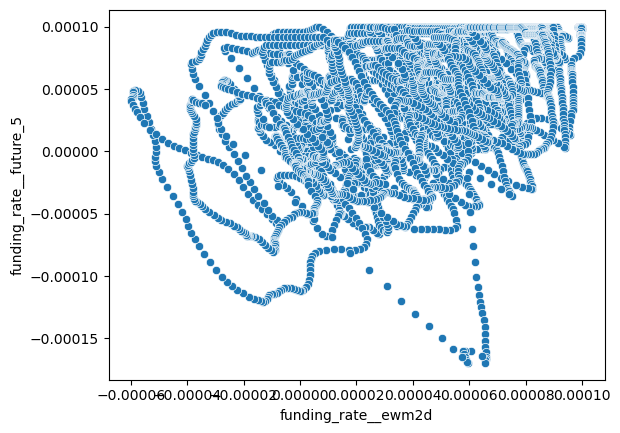

In [31]:
# Plot funding_rate_ema_2d vs funding_rate_future_5
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="funding_rate__ewm2d", y="funding_rate__future_5", ax=ax)
fig.show()


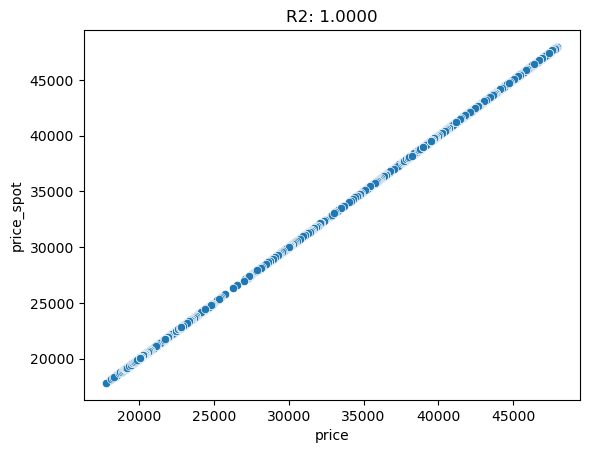

In [33]:
from sklearn.metrics import r2_score

# plot price vs price_spot
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="price", y="price_spot", ax=ax)
r2 = r2_score(df["price"], df["price_spot"])
ax.set_title(f"R2: {r2:.4f}") 
fig.show()

## Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df["fr_ema_delta"] = df["funding_rate_ema_14d"] - df["funding_rate_ema_14d"].shift(1)
df["fr_fut_5_delta"] = df["funding_rate_future_5"].shift(-1) - df["funding_rate_future_5"].shift(0)

df_tmp = df[["fr_ema_delta", "funding_rate_ema_14d", "funding_rate_future_5"]].dropna()
print(df_tmp.shape, df.shape)
x = df_tmp[["fr_ema_delta", "funding_rate_ema_14d"]]
y = df_tmp["funding_rate_future_5"]
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

# plot y_pred vs y
fig, ax = plt.subplots()
sns.scatterplot(x=y_pred, y=y, ax=ax)
fig.show()
